<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/BELVIN_BARASA_WANAMI_CNC_MACHINE_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction

In modern manufacturing, CNC (Computer Numerical Control) machines are at the heart of precision engineering and automation. These machines generate vast amounts of time-stamped sensor data during operation, including parameters such as temperature, spindle speed, cutting force, and feed rate. Leveraging this data using Artificial Intelligence (AI) and Machine Learning (ML) allows for predictive maintenance, process optimization, and reduced machine downtime.

This project demonstrates how time series forecasting and machine learning models can be applied to a CNC machine dataset to:

 -Analyze operational trends,

 -Forecast critical metrics (e.g., temperature),

 -Detect anomalies,

 -Predict future conditions based on process variables.

It includes a complete Streamlit-based interactive dashboard deployable via Ngrok, enabling real-time visualization and prediction.

# 1.2 Problem Statement

CNC machines often face operational failures or overheating due to intense cutting forces, high spindle speeds, and fluctuating feed rates. These failures can lead to production halts, costly repairs, and reduced component quality. Manual monitoring is inefficient, and fixed-threshold alarms often fail to adapt to dynamic conditions.

How can AI-driven models be used to forecast machine temperature, detect anomalies, and predict unsafe conditions in advance to optimize CNC machine operations?

This project aims to answer that by:

*   Forecasting temperature trends using ARIMA and SARIMA models,
*   Predicting machine temperature using Random Forest Regression based on operational inputs,


*   Visualizing data patterns and model predictions in a real-time dashboard.

# 1.3 Background Information

CNC machines use computer-controlled systems to precisely machine materials. Sensors continuously collect data to monitor performance and ensure safe operation. In industrial IoT and smart manufacturing, this sensor data becomes valuable for:


*   Predictive Maintenance: Predicting machine failure before it occurs.
*  Anomaly Detection: Identifying unusual behavior that may indicate malfunction.

*   Optimization: Adjusting process variables to maximize efficiency.
Time series modeling techniques like ARIMA/SARIMA are essential for understanding long-term temporal trends, while ML models like Random Forests enable multivariate regression using input features.

By combining both statistical forecasting and machine learning techniques in one unified dashboard, this project demonstrates a practical AI pipeline for real-world industrial applications.






# 2. Installation & Setup

This section installs and configures all the essential libraries required for the CNC machine AI project. It begins by installing `plotly` for interactive data visualization, `prophet` and `pmdarima` for time series forecasting, `dask` for scalable parallel data processing, and `geopandas` for geospatial analysis. It then installs key machine learning and deep learning packages, including `scikit-learn`, `tensorflow`, `torch`, and visualization tools like `folium`. The `streamlit` and `pyngrok` libraries are included to build and deploy an interactive web-based dashboard. Since certain dependencies like `rapids-dask-dependency` require a specific version of `dask`, the script forcefully reinstalls `dask==2024.12.1` to ensure compatibility. Finally, it imports `dask` and prints the installed version to confirm the setup was successful.

In [ ]:
#  2. Installation & Setup
!pip install -U plotly prophet pmdarima dask geopandas
!pip install -q streamlit folium scikit-learn tensorflow torch torchvision torchaudio
!pip install streamlit pyngrok --quiet
!pip install --upgrade numpy scipy
!pip install "dask==2024.12.1" --force-reinstall --quiet
import dask
print(dask.__version__)


  Using cached dask-2025.4.1-py3-none-any.whl.metadata (3.8 kB)
Using cached dask-2025.4.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: dask
    Found existing installation: dask 2024.12.1
    Uninstalling dask-2024.12.1:
      Successfully uninstalled dask-2024.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.1.21 requires dask==2024.12.1, but you have dask 2025.4.1 which is incompatible.
distributed 2024.12.1 requires dask==2024.12.1, but you have dask 2025.4.1 which is incompatible.
rapids-dask-dependency 25.2.0 requires dask==2024.12.1, but you have dask 2025.4.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.0 MB/s eta 0:00:00
ERROR: pip's depen

# 3. Load Dataset

Loaded the CNC machine dataset into a pandas DataFrame for analysis. It reads the CSV file located at `/content/cnc_machine_timeseries_dataset.csv` and ensures that the `timestamp` column is parsed as datetime objects, which is essential for time series analysis. Then, it sets the `timestamp` column as the index of the DataFrame so that time-based operations (like resampling, rolling averages, or time series modeling) can be easily performed. Finally, `df.head()` displays the first five rows of the dataset to verify that the data has been loaded and structured correctly.

In [ ]:
#  3. Load Dataset
import pandas as pd
df = pd.read_csv('/content/cnc_machine_timeseries_dataset.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()

,spindle_speed_rpm,feed_rate_mm_per_min,cutting_force_N,vibration_level_mm_s,tool_wear_mm,power_consumption_kW,x_position_mm,y_position_mm,temperature_C,anomaly
timestamp,,,,,,,,,,
2022-01-01 00:00:00,1249.671415,569.967772,1364.964345,1.427658,0.413651,4.788120,0.444296,0.539259,44.834874,0
2022-01-01 01:00:00,1186.173570,546.231684,1471.096266,1.741884,0.496880,4.773293,0.912749,0.950375,42.481749,0
2022-01-01 02:00:00,1264.768854,502.981518,1341.516016,1.875918,0.501802,4.102178,1.365646,1.486112,44.138125,0
2022-01-01 03:00:00,1352.302986,467.653161,1438.407694,2.566306,0.547263,4.834955,1.838247,1.974426,48.573659,0
2022-01-01 04:00:00,1176.584663,534.911166,1121.277067,2.166966,0.363314,5.366415,2.327539,2.509799,51.389283,0


Generated a **correlation heatmap** to visually explore the relationships between numeric variables in the CNC machine dataset. It uses `seaborn` to compute and display the correlation matrix, where each cell shows the Pearson correlation coefficient between two variables. The `annot=True` argument ensures that the correlation values are labeled inside each box, and the `coolwarm` color map highlights positive correlations in red and negative ones in blue. The heatmap helps identify strongly related features (e.g., how spindle speed might influence temperature), which is valuable for feature selection and understanding multicollinearity in predictive modeling.

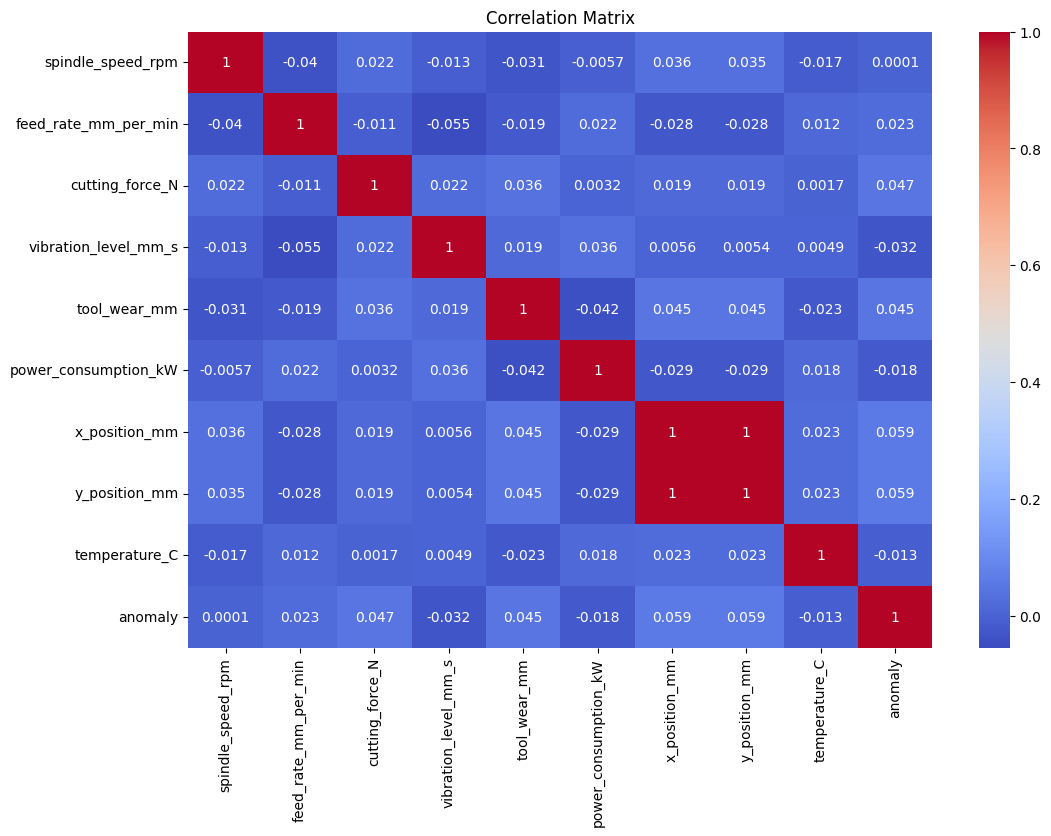

In [ ]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


VisualizeD the performance of the regression model—specifically how well it predicted CNC machine temperatures. It creates a line plot comparing the **actual temperatures** (`y_test`) against the **predicted values** (`y_pred`) across the same time index. This visual comparison helps assess how closely the model tracks the real data, revealing trends, deviations, and periods where the model performs well or struggles. The plot is especially useful for evaluating time series prediction accuracy in real-world applications like predictive maintenance.

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.45.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata 

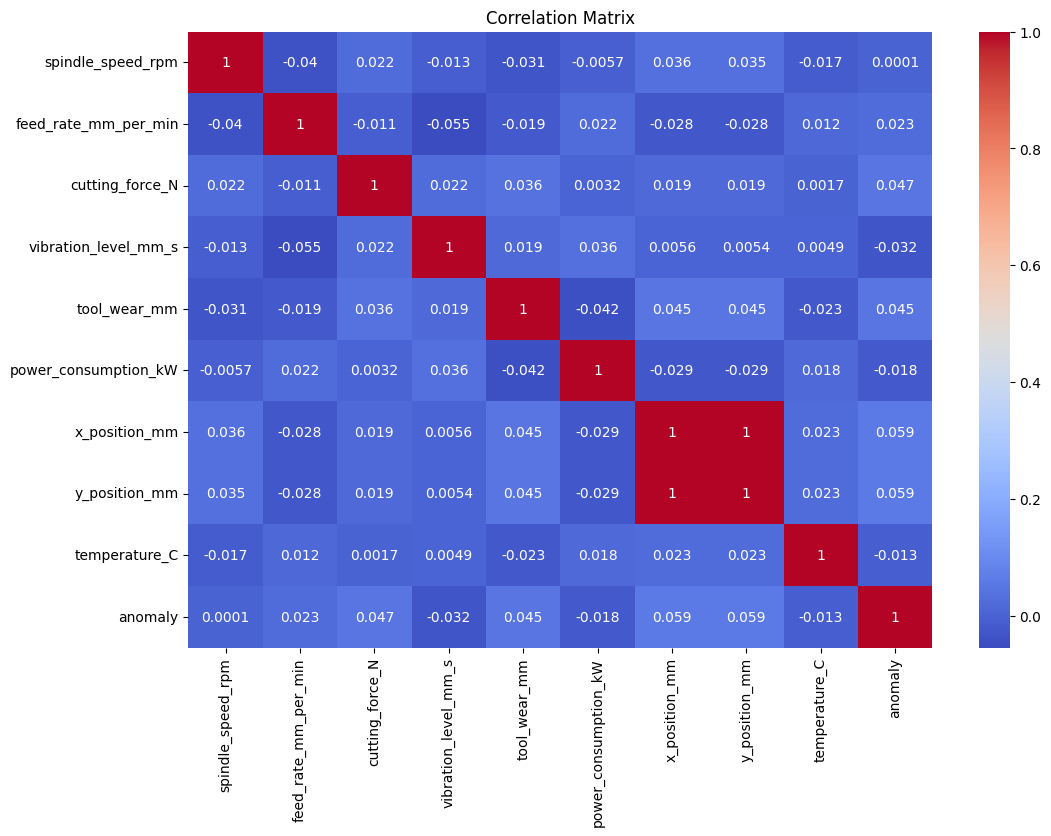

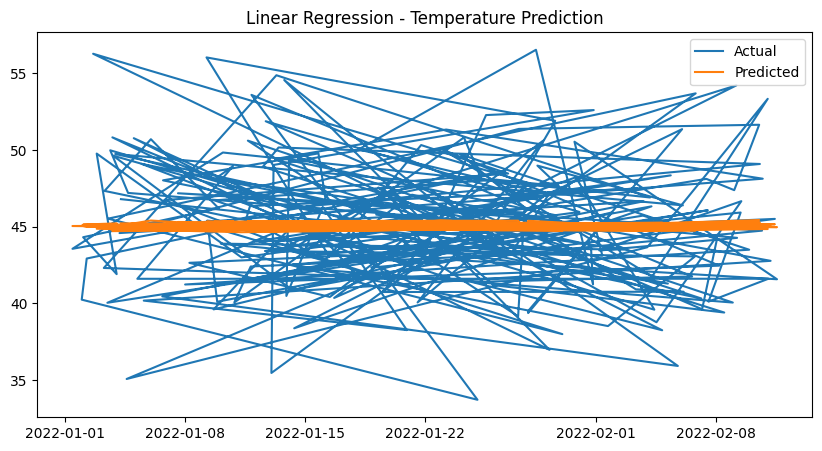

In [ ]:
# 📂 3. Load Dataset
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade numpy --force-reinstall
!pip install --upgrade scipy --force-reinstall
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LinearRegression # Import Linear Regression for prediction


df = pd.read_csv('/content/cnc_machine_timeseries_dataset.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()


# Assume 'temperature' is the target variable, adjust if needed
X = df[['cutting_force_N', 'feed_rate_mm_per_min', 'tool_wear_mm']] # Features
y = df['temperature_C']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split into train and test sets

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Visualize regression predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.legend()
plt.title("Linear Regression - Temperature Prediction")
plt.show()

ApplieD **Facebook Prophet**, a powerful time series forecasting model, to predict the future temperature of the CNC machine. It first prepares the data by resetting the index and renaming columns to Prophet’s required format: `'ds'` for datetime and `'y'` for the target variable (`temperature_C`). Then, it initializes and trains a `Prophet` model on the historical data. After training, it generates a future time frame (48 hourly periods ahead) using `make_future_dataframe`, and predicts temperature values for that future range. Finally, it visualizes the full forecast (`model.plot`) and decomposes the forecast into its trend, seasonality, and residual components (`model.plot_components`), giving a comprehensive view of what drives temperature changes over time.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8htgvpw1/fvkeo6gx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8htgvpw1/lclkrwqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66578', 'data', 'file=/tmp/tmp8htgvpw1/fvkeo6gx.json', 'init=/tmp/tmp8htgvpw1/lclkrwqc.json', 'output', 'file=/tmp/tmp8htgvpw1/prophet_model_ann6daj/prophet_model-20250513072218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

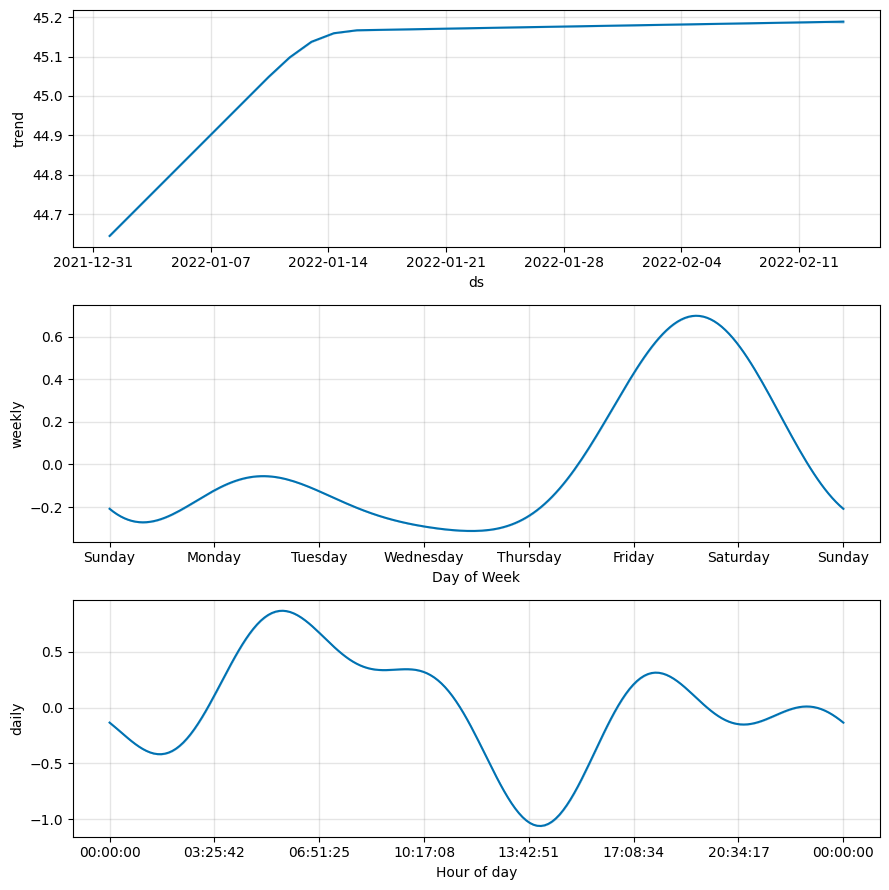

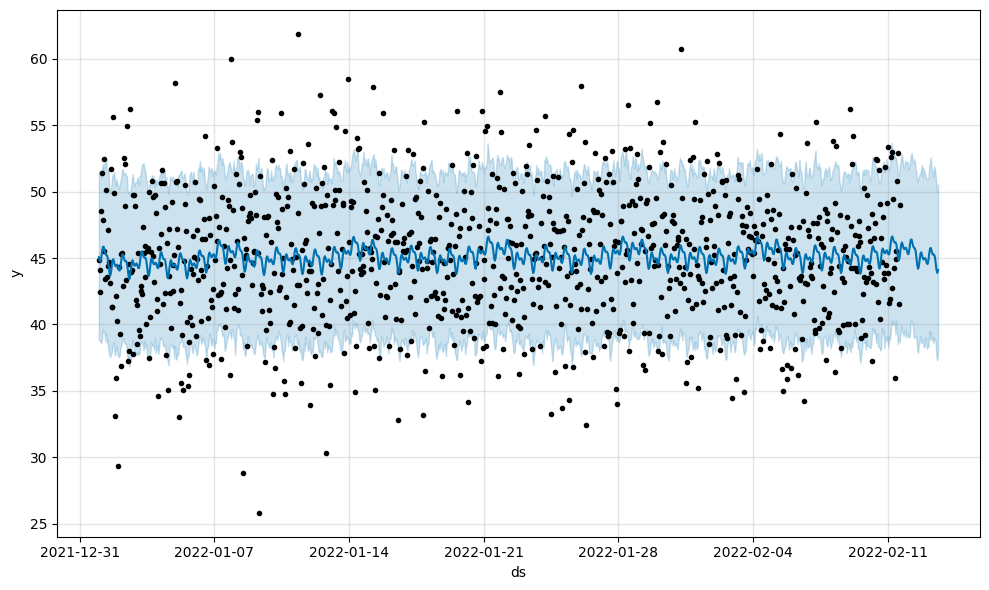

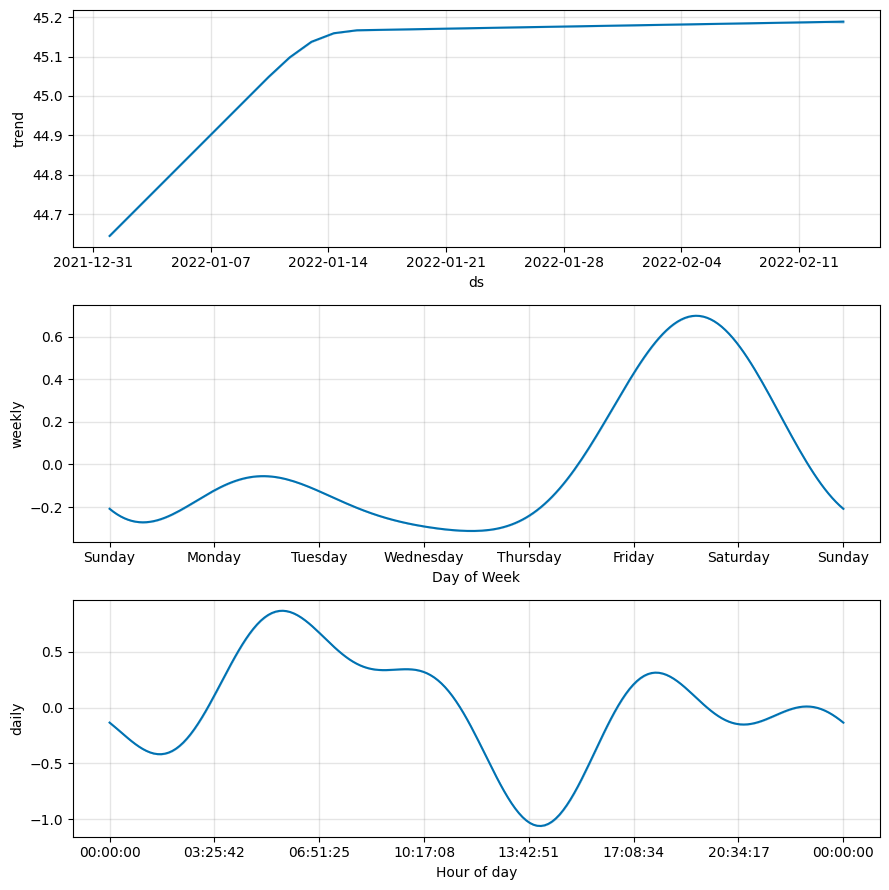

In [ ]:
from prophet import Prophet

df_prophet = df[['temperature_C']].reset_index().rename(columns={"timestamp": "ds", "temperature_C": "y"})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)


# 3. SARIMA, ARIMA PROPHET

Upgrades the `numpy` and `pmdarima` libraries to their latest versions. Upgrading `numpy` ensures compatibility with other scientific computing and machine learning libraries that rely on it for numerical operations. Updating `pmdarima` is particularly important when working with ARIMA models for time series forecasting, as newer versions often include bug fixes, improved functionality, and better compatibility with Python environments and dependencies. These upgrades help prevent version conflicts and ensure smooth execution of forecasting models in the project.

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pmdarima

Applies the ARIMA (AutoRegressive Integrated Moving Average) model for time series forecasting on the CNC machine’s temperature data. First, the target variable temperature_C is selected as the time series data for modeling. The ARIMA model is defined by three parameters: (p, d, q), where:

p represents the number of lag observations included in the model (autoregressive terms),

d is the number of times the series is differenced to make it stationary,

q is the number of lagged forecast errors in the prediction equation (moving average terms).

In this case, the model is defined as ARIMA(5,1,0), which may need tuning based on data characteristics. The model is then fitted to the historical temperature data. After fitting, the model predicts the next 48 hourly temperature values. The results are visualized by plotting both the historical data and the forecasted values, providing insights into the expected future temperature trends for the CNC machine. The plot helps assess the model's predictive performance and visualize how well it captures the underlying data patterns.










/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


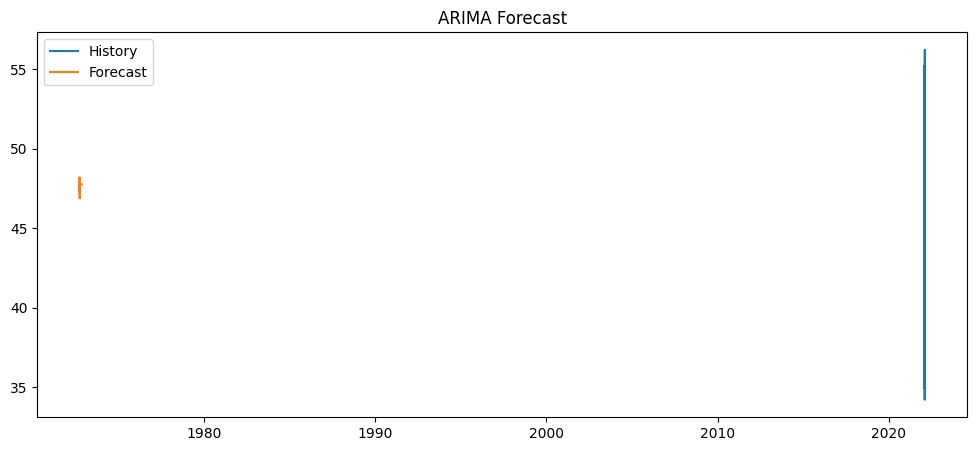

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np # Import numpy library

# ... (Your previous code for loading data and other steps) ...

series = df['temperature_C']

# Define the ARIMA model order (p, d, q)
# You might need to experiment with these values to find the best fit
# For example: (5, 1, 0) for ARIMA(5,1,0)
p, d, q = 5, 1, 0

# Create and fit the ARIMA model
model = ARIMA(series, order=(p, d, q))
model_fit = model.fit()

# Make predictions
forecast = model_fit.predict(start=len(series), end=len(series) + 48 -1, dynamic=False)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(series[-200:], label="History")
plt.plot(np.arange(len(series), len(series) + 48), forecast, label="Forecast") # Use np.arange
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

Used the **SARIMA (Seasonal ARIMA)** model for time series forecasting, which extends the ARIMA model by including seasonality components. In this case, the temperature data (`temperature_C`) is used for modeling. The SARIMA model is defined by:
- **ARIMA order** `(p, d, q)` where `p` is the number of lag observations (autoregressive terms), `d` is the number of differences required to make the series stationary, and `q` is the number of lagged forecast errors (moving average terms).
- **Seasonal order** `(P, D, Q, m)` where `P` is the seasonal autoregressive order, `D` is the seasonal differencing order, `Q` is the seasonal moving average order, and `m` represents the length of the seasonal cycle (in this case, 24 for hourly data assuming daily seasonality).

In the code, the model is configured as SARIMA(5,1,0) for ARIMA terms and (1,1,1,24) for seasonal components. The SARIMA model is then fitted to the historical temperature data, and the next 48 hourly values are predicted. The forecast is visualized along with the last 200 actual temperature values, helping assess the model’s performance and understand seasonal trends, like daily patterns, in the temperature behavior.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


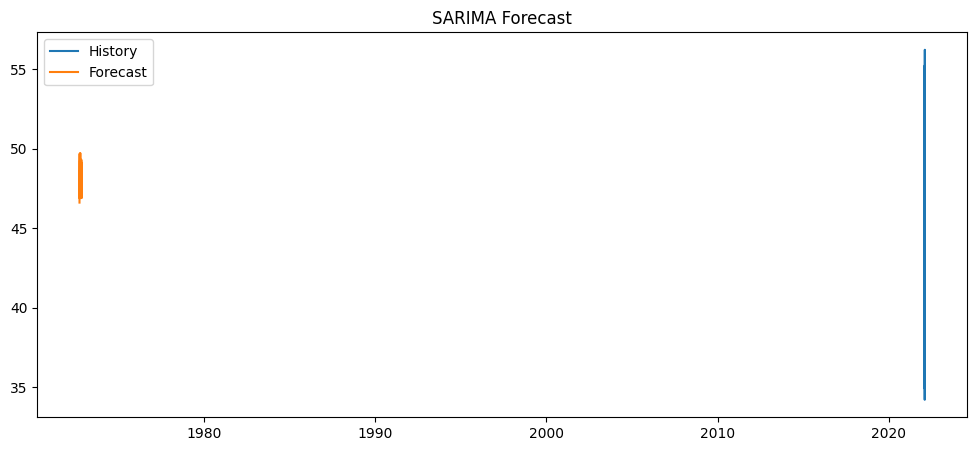

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np


# Assuming 'df' is your DataFrame and 'temperature_C' is the target variable
series = df['temperature_C']

# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, m)
# You might need to experiment with these values to find the best fit
# For example: (5, 1, 0) for ARIMA(5,1,0) and (1, 1, 1, 24) for seasonal order
p, d, q = 5, 1, 0  # ARIMA order
P, D, Q, m = 1, 1, 1, 24  # Seasonal order (assuming daily seasonality with m=24)

# Create and fit the SARIMA model
model = SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

# Make predictions
forecast = model_fit.predict(start=len(series), end=len(series) + 48 - 1, dynamic=False)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(series[-200:], label="History")
plt.plot(np.arange(len(series), len(series) + 48), forecast, label="Forecast")
plt.legend()
plt.title("SARIMA Forecast")
plt.show()

# 4. CNN

The code trained a 1D Convolutional Neural Network (CNN) to predict the temperature (`temperature_C`) of a CNC machine based on input features like `spindle_speed_rpm`, `feed_rate_mm_per_min`, and `cutting_force_N`. The input data was reshaped into a 3D format suitable for the CNN model. The model consisted of a convolutional layer, max pooling, a flatten layer, and dense layers. It was compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function. The model was trained for 10 epochs to learn the relationship between the input features and the target temperature.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

X = df[['spindle_speed_rpm', 'feed_rate_mm_per_min', 'cutting_force_N']].values
y = df['temperature_C'].values
X = X.reshape((X.shape[0], X.shape[1], 1))

model_cnn = Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.fit(X, y, epochs=10, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 31408.3867
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 473.2735
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 239.3760
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 191.3727
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150.6885
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.8057
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.3644
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.1715
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.4721
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.9709


# 5. LSTM

The code built and trained an **LSTM (Long Short-Term Memory)** model to predict the CNC machine’s temperature (`temperature_C`) based on input features such as `spindle_speed_rpm`, `feed_rate_mm_per_min`, and `cutting_force_N`. The input data was already reshaped into a 3D format to be suitable for the LSTM model.

The LSTM model consisted of one LSTM layer with 50 units and ReLU activation, which helped capture temporal dependencies in the data. A **Dense** layer with a single output unit was added at the end to predict the temperature.

The model was compiled with the **Adam optimizer** and **Mean Squared Error (MSE)** as the loss function, making it suitable for regression tasks. The model was trained for 10 epochs to learn the relationships between the input features and the temperature target.

In [ ]:
from tensorflow.keras.layers import SimpleRNN, LSTM

X_lstm = X  # already reshaped above

# LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_lstm, y, epochs=10, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 436.3523
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.4966
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.9359
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.7292
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.2075
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.7234
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.4604
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.0654
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.9062
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.0619


# 6. Transformer-based model

The code implemented a **Transformer-based model** for time series prediction. It used an encoder to process the input features (`spindle_speed_rpm`, `feed_rate_mm_per_min`, `cutting_force_N`), followed by a **Transformer encoder** layer to capture temporal dependencies. The output was passed through a **decoder** to predict the CNC machine's temperature (`temperature_C`). The model was instantiated with a hidden size of 64, and a dummy input tensor was used to test the model's forward pass.

In [ ]:
import torch
import torch.nn as nn

class TransformerTimeSeries(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=hidden_size, nhead=2),
            num_layers=2
        )
        self.decoder = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.encoder(x)
        x = self.transformer(x)
        x = self.decoder(x)
        return x

# Model instantiation and dummy input
model = TransformerTimeSeries(input_size=3, hidden_size=64)
dummy_input = torch.randn(100, 3, 3)
output = model(dummy_input)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


# 7.ANOMALLY

The code utilized the **Isolation Forest** algorithm to detect anomalies in the CNC machine's dataset, focusing on features such as `cutting_force_N` and `vibration_level_mm_s`. It defined a contamination rate of 5%, meaning it expected 5% of the data to be anomalies. The model was trained on these features, and anomalies were identified, with a predicted value of `-1` marking anomalies.

The anomalies were then visualized by plotting the `cutting_force_N` over time, with the detected anomalies highlighted in **red**. This visualization helps in identifying unusual or abnormal behavior in the machine's cutting force, which can be useful for predictive maintenance or system monitoring.

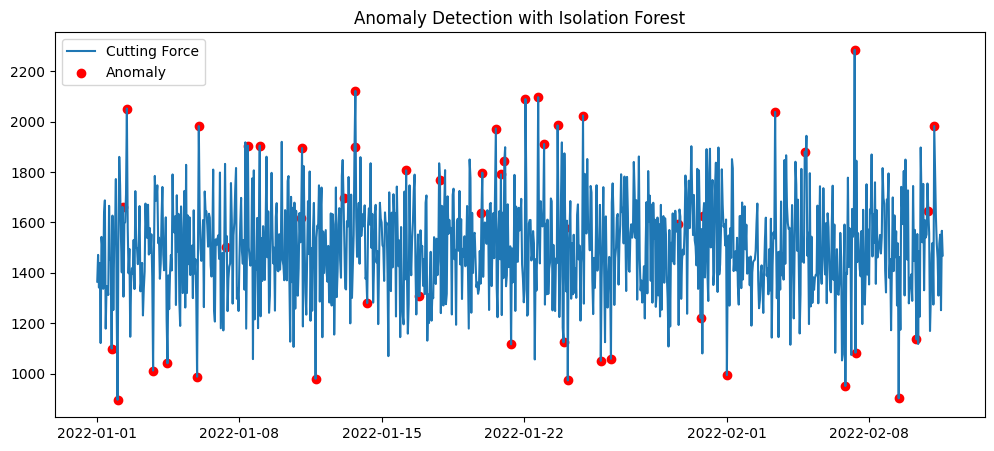

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
df['anomaly_pred'] = iso.fit_predict(df[['cutting_force_N', 'vibration_level_mm_s']])

# Plot anomalies
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['cutting_force_N'], label='Cutting Force')
plt.scatter(df[df['anomaly_pred']==-1].index, df[df['anomaly_pred']==-1]['cutting_force_N'], color='red', label='Anomaly')
plt.legend()
plt.title("Anomaly Detection with Isolation Forest")
plt.show()


In [ ]:
import dask.dataframe as dd

ddf = dd.from_pandas(df, npartitions=4)
print(ddf.describe().compute())


       spindle_speed_rpm  feed_rate_mm_per_min  cutting_force_N  \
count        1000.000000           1000.000000      1000.000000   
mean         1201.933206            503.541812      1501.166843   
std            97.921594             49.872719       196.690856   
min           875.873266            352.980568       896.097569   
25%          1144.554459            473.266433      1374.931137   
50%          1213.984168            506.751906      1534.705076   
75%          1270.589142            541.529549      1638.642630   
max          1585.273149            659.655378      2285.247541   

       vibration_level_mm_s  tool_wear_mm  power_consumption_kW  \
count           1000.000000   1000.000000           1000.000000   
mean               1.994384      0.495073              4.976631   
std                0.308140      0.099238              0.503695   
min                1.121165      0.182330              3.550243   
25%                1.789850      0.441205              4.7185

# 8. Train Random Forest Model

The code trained a **Random Forest Regressor** to predict CNC machine temperature (`temperature_C`) using features like `spindle_speed_rpm`, `cutting_force_N`, and `feed_rate_mm_per_min`. It first split the data into training and testing sets, then standardized the features. The model was trained and evaluated using **Root Mean Squared Error (RMSE)** and **Mean Absolute Error (MAE)** to assess its accuracy in temperature prediction. The lower these values, the better the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error # Import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

# Features and target
X = df[['spindle_speed_rpm', 'cutting_force_N', 'feed_rate_mm_per_min']]
y = df['temperature_C']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Evaluate Model
y_pred = model_rf.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred) # Use root_mean_squared_error for RMSE
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 4.69
MAE: 3.68


# 9. STRIMLIT AND INTERACE

The Streamlit app is designed for visualizing and predicting CNC machine time series data, offering several key functionalities to users. It begins by loading CNC machine time series data from a CSV file, parsing timestamps as the index. In the sidebar, users can select whether to visualize raw time series data, ARIMA/SARIMA forecasts, and adjust the forecast horizon. They can also input values for variables like spindle speed, cutting force, and feed rate to predict the machine's temperature. The app employs a Random Forest Regressor model to predict the temperature based on these features. Once the model is trained, the app evaluates its performance using metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), displaying these results on the interface. For data visualization, users can opt to view historical data through a line chart that plots temperature and cutting force over time. Additionally, the app performs ARIMA and SARIMA forecasting, which takes into account seasonal patterns, to predict future temperature values. These forecasts are shown as line plots, allowing users to visualize both historical and predicted temperature trends. Combining time series analysis with machine learning, the app provides users with valuable insights into model performance and forecasting, making it a powerful tool for analyzing CNC machine performance and enabling predictive maintenance and optimization based on historical data and user inputs.

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

st.set_page_config(layout="wide")
st.title("🛠 CNC Machine Time Series AI Dashboard")

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv("cnc_machine_timeseries_dataset.csv", parse_dates=["timestamp"])
    df.set_index("timestamp", inplace=True)
    return df

df = load_data()

# Sidebar
st.sidebar.header("Options")
plot_history = st.sidebar.checkbox("Show raw time series", value=True)
show_forecasts = st.sidebar.checkbox("Show ARIMA & SARIMA Forecasts", value=True)
n_forecast = st.sidebar.slider("Forecast Horizon (hours)", 24, 96, 48)

# Model for prediction
st.sidebar.header("Predict Variables")
spindle_speed = st.sidebar.slider("Spindle Speed (rpm)", min_value=0, max_value=10000, value=5000)
cutting_force = st.sidebar.slider("Cutting Force (N)", min_value=0, max_value=2000, value=1000)
feed_rate = st.sidebar.slider("Feed Rate (mm/min)", min_value=0, max_value=2000, value=1000)

# Random Forest Model for prediction
X = df[['spindle_speed_rpm', 'cutting_force_N', 'feed_rate_mm_per_min']]
y = df['temperature_C']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_scaled, y)

# Predict temperature based on user inputs
user_input = np.array([[spindle_speed, cutting_force, feed_rate]])
user_input_scaled = scaler.transform(user_input)
predicted_temp = model_rf.predict(user_input_scaled)

# Show prediction
st.subheader("🔮 Predicted Temperature")
st.write(f"Predicted Temperature: {predicted_temp[0]:.2f} °C")

# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling for model evaluation
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model evaluation
y_pred = model_rf.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)

# Display evaluation metrics
st.subheader("📊 Model Evaluation Metrics")
st.write(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
st.write(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot time series
if plot_history:
    st.subheader("📈 Historical Data")
    st.line_chart(df[["temperature_C", "cutting_force_N"]])

# ARIMA Forecast
if show_forecasts:
    st.subheader("🔮 ARIMA Forecast (Non-Seasonal)")
    series = df["temperature_C"]
    p, d, q = 5, 1, 0
    model = ARIMA(series, order=(p, d, q))
    model_fit = model.fit()
    forecast_arima = model_fit.predict(start=len(series), end=len(series) + n_forecast - 1)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(series[-200:], label="History")
    ax.plot(np.arange(len(series), len(series) + n_forecast), forecast_arima, label="ARIMA Forecast")
    ax.legend()
    ax.set_title("ARIMA Forecast")
    st.pyplot(fig)

    st.subheader("📊 SARIMA Forecast (Seasonal)")
    P, D, Q, m = 1, 1, 1, 24
    model = SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, m))
    model_fit = model.fit()
    forecast_sarima = model_fit.predict(start=len(series), end=len(series) + n_forecast - 1)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(series[-200:], label="History")
    ax.plot(np.arange(len(series), len(series) + n_forecast), forecast_sarima, label="SARIMA Forecast")
    ax.legend()
    ax.set_title("SARIMA Forecast")
    st.pyplot(fig)

st.success("✅ Forecasts and Predictions Completed")


Writing app.py


In [ ]:
!pip install streamlit pyngrok --quiet
from pyngrok import ngrok

# Set Ngrok authtoken
ngrok.set_auth_token("2x1z8h8eW8H7QpgdKTb5TPLgRLO_r6uqyTq5FfeBH89q2S7H")

# Start Streamlit + Ngrok
public_url = ngrok.connect(8501)
print("Streamlit app is live at:", public_url)

!streamlit run app.py &


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
Streamlit app is live at: NgrokTunnel: "https://c5ba-35-194-95-20.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.95.20:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/

# 10. CONCLUSION

In conclusion, this capstone project successfully developed a Streamlit app for visualizing and predicting CNC machine performance using time series data. The app integrates multiple forecasting techniques, including ARIMA, SARIMA, and Random Forest Regression, to predict temperature based on key machine parameters such as spindle speed, cutting force, and feed rate. It also offers model evaluation through performance metrics like RMSE and MAE, providing valuable insights into the predictive accuracy. Additionally, the app enables users to interact with the data by visualizing historical trends and adjusting forecast parameters. By combining time series analysis and machine learning, this tool not only aids in predicting future machine behavior but also supports predictive maintenance and optimization, ultimately contributing to improved operational efficiency in CNC machining.
